In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Model Comparison

Compare Deterministic LPN with MAML and baseline model. All models were trained on 30000 iterations with 25 tasks each and tested on 600 tasks. The LPN was trained and evaluated in lpn4sine_deterministic.ipynb. 

LPN model:
- Encoder: phi=ReluNet(2, 32, 32),
           rho_0=ReluNet(32, 32, 16),
           rho_1=ReluNet(16, 8, d_latent)

- Decoder: d_hidden = [32, 32]

- Dimension of latent representation: 2

- Number of gradident optimizations of Z in training: 2
- Number of gradident optimizations Z in test: 10

Remarks: 
- The model has more parameters than MAML. MAML is 2 layer MLP with layer size of 40.
- Could tune for even smaller LPN models. Can use lp4sine_deterministic_tuning notebook for that 

In [132]:
# Helper function to extract plot components
def extract_plot_data(df):
    mu = df["mu"].values
    ci = df["ci"].values
    lower_err = np.minimum(ci, mu)  # ensures lower bound ≥ 0
    upper_err = ci
    yerr = np.vstack([lower_err, upper_err])
    lower_bound = np.maximum(0, mu - ci)
    upper_bound = mu + ci
    return mu, yerr, lower_bound, upper_bound

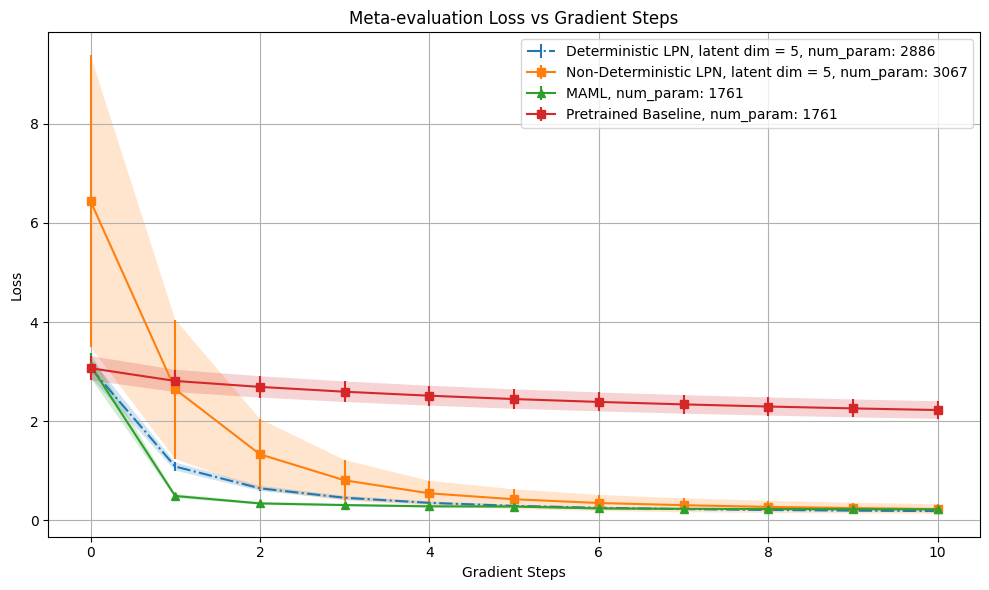

In [133]:
def plot_figure(lpn_titles = None, colors_lpn = None,  lpn_file_names = None,
                maml_file = None, baseline_file = None):
    
    OPTIMIZATION_STEPS = 10
    # X-axis
    test_numstep = OPTIMIZATION_STEPS
    x = np.arange(test_numstep + 1)
    plt.figure(figsize=(10, 6))
    
    # LPNs
    if lpn_file_names:
        for i in range(len(lpn_file_names)):
            lpn_df = pd.read_csv(lpn_file_names[i])
            title = lpn_titles[i]
            num_parameters = lpn_df["num_parameters"][0]
            title = title + ", num_param: " + str(num_parameters)
            color = colors[i]
            mu, yerr, lb, ub = extract_plot_data(lpn_df)
            plt.errorbar(x, mu, yerr=yerr, fmt=color, label=title)
            plt.fill_between(x, lb, ub, alpha=0.2)
    
    if maml_file:
        # MAML
        maml_df = pd.read_csv(maml_file, skiprows=[0,2], header = None).T
        maml_df.columns = ["mu", "ci"]
        
        mu_maml, yerr_maml, lb_maml, ub_maml = extract_plot_data(maml_df)
        plt.errorbar(x, mu_maml, yerr=yerr_maml, fmt='-^', label="MAML, num_param: 1761")
        plt.fill_between(x, lb_maml, ub_maml, alpha=0.2)
                
    if baseline_file:
        # Baseline
        base_line_df = pd.read_csv(baseline_file, skiprows=[0,2], header = None).T
        base_line_df.columns = ["mu", "ci"]
        
        mu_base, yerr_base, lb_base, ub_base = extract_plot_data(base_line_df)
        plt.errorbar(x, mu_base, yerr=yerr_base, fmt='-s', label="Pretrained Baseline, num_param: 1761")
        plt.fill_between(x, lb_base, ub_base, alpha=0.2)
    
    
    # Labels and legend
    plt.xlabel('Gradient Steps')
    plt.ylabel('Loss')
    plt.title('Meta-evaluation Loss vs Gradient Steps')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
lpn_titles = ["Deterministic LPN, latent dim = 5", "Non-Deterministic LPN, latent dim = 5"]
lpn_files = ["eval_data/LPN_eval_tuned5.csv","eval_data/LPN_eval_tuned5_non_deterministic.csv"]
maml_file = "eval_data/maml_eval.csv"
baseline_file = "eval_data/pretrain_eval.csv"
colors_lpn = ["-.", "-s"]

plot_figure(lpn_titles = lpn_titles, lpn_file_names = lpn_files, colors_lpn = colors_lpn, maml_file = maml_file, 
            baseline_file = baseline_file)

Deterministic LPN performance vs MAML and baseline

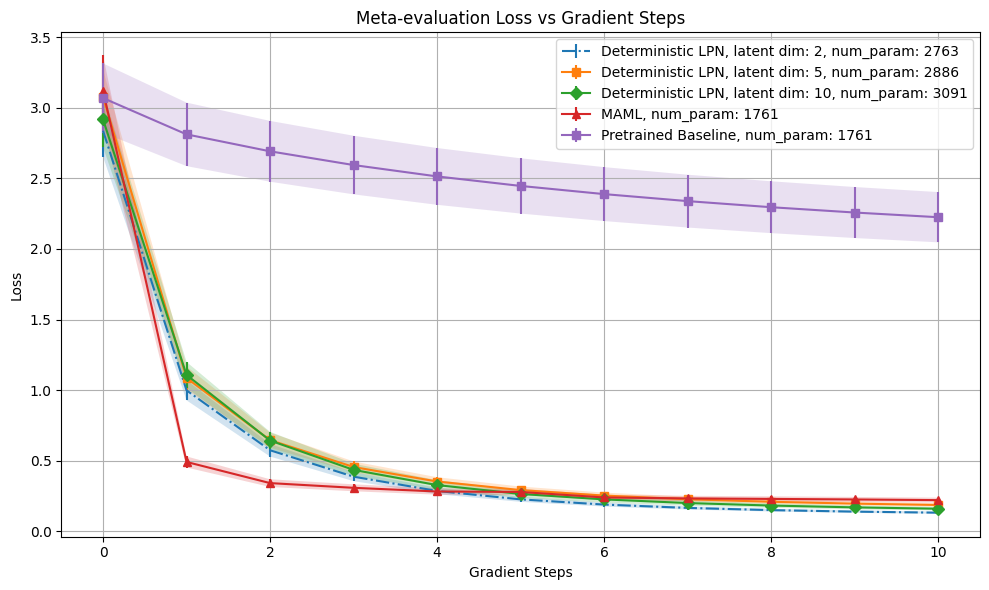

In [134]:
lpn_files = ["eval_data/LPN_eval_tuned2.csv", "eval_data/LPN_eval_tuned5.csv", "eval_data/LPN_eval_tuned10.csv"]

lpn_titles = ["Deterministic LPN, latent dim: 2", "Deterministic LPN, latent dim: 5", "Deterministic LPN, latent dim: 10"]

colors_lpn = ["-.", "-s", "-D"]

maml_file = "eval_data/maml_eval.csv"
baseline_file = "eval_data/pretrain_eval.csv"

plot_figure(lpn_titles = lpn_titles, colors_lpn = colors_lpn, lpn_file_names = lpn_files, maml_file = maml_file, 
            baseline_file = baseline_file)


Non deterministic LPN vs MAML and baseline

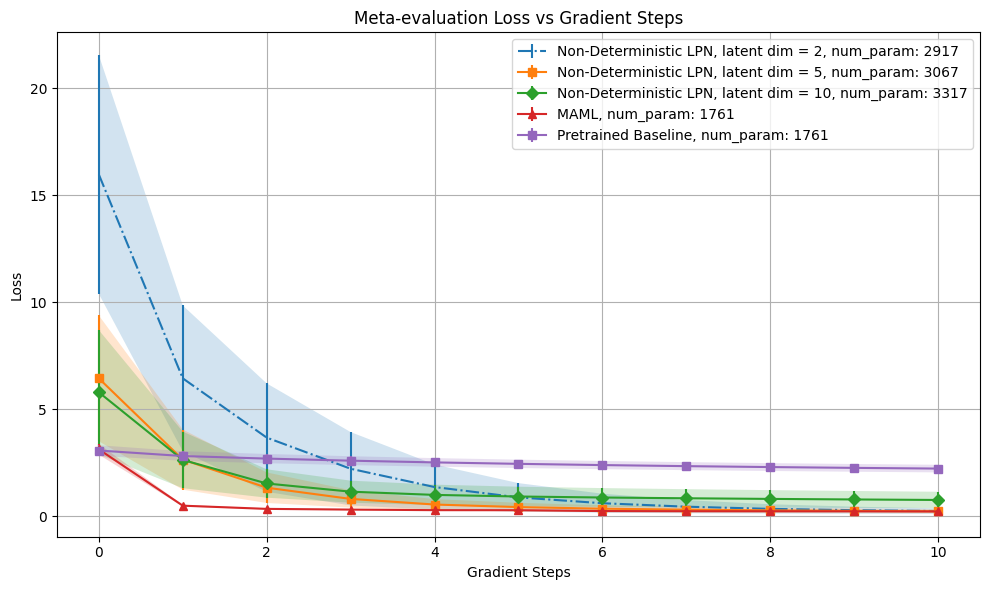

In [135]:



lpn_files = ["eval_data/LPN_eval_tuned2_non_deterministic.csv", "eval_data/LPN_eval_tuned5_non_deterministic.csv", "eval_data/LPN_eval_tuned10_non_deterministic.csv"]

lpn_titles = ["Non-Deterministic LPN, latent dim = 2", "Non-Deterministic LPN, latent dim = 5", "Non-Deterministic LPN, latent dim = 10"]

colors_lpn = ["-.", "-s", "-D"]

maml_file = "eval_data/maml_eval.csv"
baseline_file = "eval_data/pretrain_eval.csv"

plot_figure(lpn_titles = lpn_titles, colors_lpn = colors_lpn, lpn_file_names = lpn_files, maml_file = maml_file, 
            baseline_file = baseline_file)



Deterministic LPN vs Non-deterministic LPN

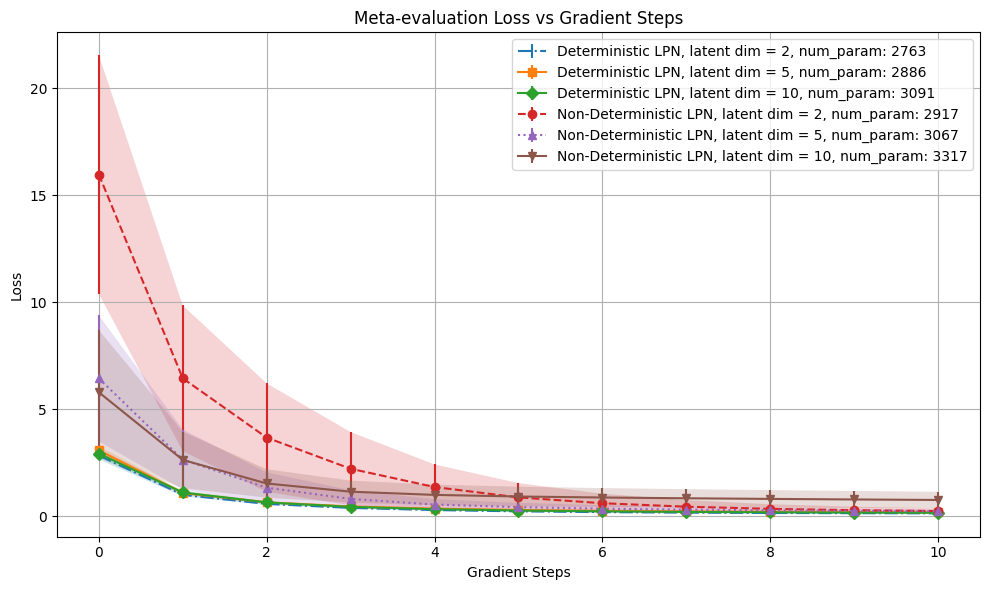

In [136]:
lpn_files = ["eval_data/LPN_eval_tuned2.csv", "eval_data/LPN_eval_tuned5.csv", "eval_data/LPN_eval_tuned10.csv",
                  "eval_data/LPN_eval_tuned2_non_deterministic.csv", "eval_data/LPN_eval_tuned5_non_deterministic.csv", 
                  "eval_data/LPN_eval_tuned10_non_deterministic.csv"]

lpn_titles = ["Deterministic LPN, latent dim = 2", "Deterministic LPN, latent dim = 5", "Deterministic LPN, latent dim = 10",
              "Non-Deterministic LPN, latent dim = 2", "Non-Deterministic LPN, latent dim = 5", "Non-Deterministic LPN, latent dim = 10"]

colors_lpn = ["-.", "-s", "-D", "--o", ":^", "-v"]

plot_figure(lpn_titles = lpn_titles, colors_lpn = colors_lpn, lpn_file_names = lpn_files)

Compare non-deterministic LPN with deterministic LPN with latent dimension of 5

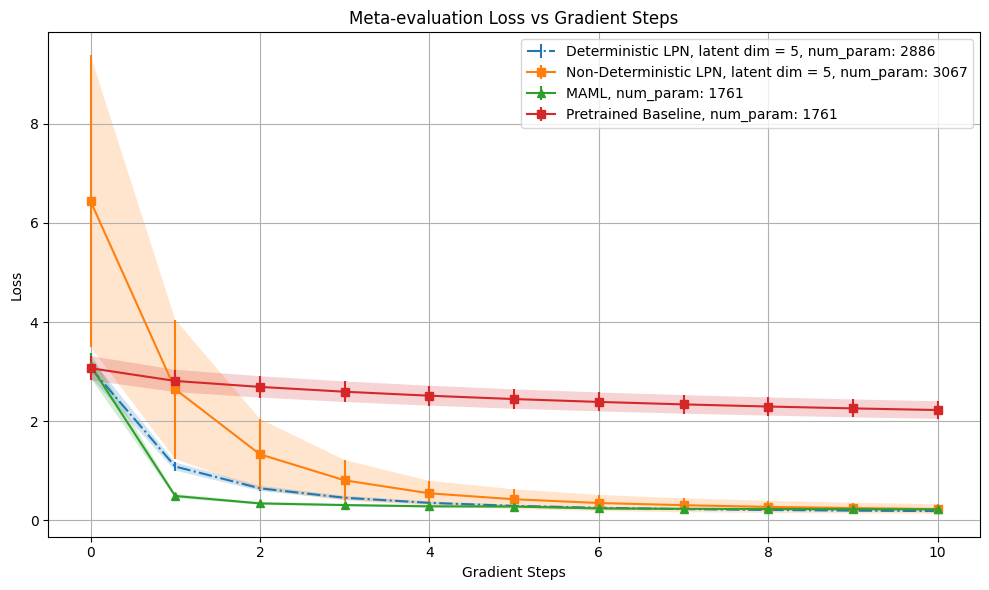

In [137]:
 
    
lpn_titles = ["Deterministic LPN, latent dim = 5", "Non-Deterministic LPN, latent dim = 5"]
lpn_files = ["eval_data/LPN_eval_tuned5.csv","eval_data/LPN_eval_tuned5_non_deterministic.csv"]
maml_file = "eval_data/maml_eval.csv"
baseline_file = "eval_data/pretrain_eval.csv"
colors_lpn = ["-.", "-s"]

plot_figure(lpn_titles = lpn_titles, lpn_file_names = lpn_files, maml_file = maml_file, 
            baseline_file = baseline_file)